In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# import the necessary libraries
import warnings
import os
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

**Import the necessary libraries to authorise Google Collab to connect to the Google Drive** 

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Get a list of files specific uploaded to the shared URL for this project**

In [ ]:
file_list = drive.ListFile({'q': "'1QYZO_AXl07d8qMYu00THIKjrxVCUaTs5' in parents"}).GetList()

In [ ]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/Data")
for f in file_list:
  print('title: %s, id: %s' % (f['title'], f['id']))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(f['title'])

title: Dataset - Prediction.zip, id: 1DSMiBe3vdYy7sziFbCEiyldDqzHgsL2A
title: Dataset - Plant-seedlings-classification.zip, id: 1ET0dF65pkI0Uo4hsyX4sX-4OhjGJvuES
title: Dataset - Images.zip, id: 1DL3gAuS6pqXUzyNorp7yQwZVngOxgMnp


**Extract the data from Plant-seedlings-classification.zip file into train and test folders**

In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Colab Notebooks/Data/Dataset - Plant-seedlings-classification.zip', 'r') as z:
  z.extractall()

**Extract the images from train folder and its sub-folders into images and labels arrays**

In [16]:
import cv2
from google.colab.patches import cv2_imshow
images = []
labels = []
label_name = ''
image_count = 0
train_path = "/content/drive/MyDrive/Colab Notebooks/Data/train/"
for label_name in os.listdir(train_path):
  if (label_name != "Common wheat"):
    for img in os.listdir(train_path + label_name):
      img = cv2.imread(train_path + label_name + '/' + img)
      img = cv2.resize(img, (32,32))
      images.append(img)
      if (label_name == 'Black-grass'):
        label = 0
      elif (label_name == 'Charlock'):
        label = 1
      elif (label_name == 'Cleavers'):
        label = 2
      elif (label_name == 'Common Chickweed'):
        label = 3
      elif (label_name == 'Fat Hen'):
        label = 4
      elif (label_name == 'Loose Silky-bent'):
        label = 5
      elif (label_name == 'Maize'):
        label = 6
      elif (label_name == 'Scentless Mayweed'):
        label = 7
      elif (label_name == 'Shepherds Purse'):
        label = 8
      elif (label_name == 'Small-flowered Cranesbill'):
        label = 9
      else:
        label = 10
      labels.append(label)
      image_count = image_count + 1
    print(label_name, image_count)
    image_count = 0

Black-grass 263
Charlock 390
Cleavers 287
Common Chickweed 611
Fat Hen 475
Loose Silky-bent 654
Maize 221
Scentless Mayweed 516
Shepherds Purse 231
Small-flowered Cranesbill 496
Sugar beet 385


**Buld the Support Vector Classifier Supervised Learning Model  to classify the images**

In [50]:
feature_list = []
for image in images:
  flat_features = image.flatten()
  feature_list.append(np.hstack(flat_features))

feature_matrix = np.array(feature_list)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# define standard scaler
sc = StandardScaler()

# run this on the feature matrix
sc_features = sc.fit_transform(feature_matrix)

pca = PCA(n_components=500)

# use fit_transform to run PCA on standardized matrix
pca_features = sc.fit_transform(sc_features)


**Convert labels list to numpy array**

In [66]:
svn_labels = np.array(labels)

**Train the Support Vector Classifier Model**

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

svn_X_train, svn_X_test, svn_y_train, svn_y_test = train_test_split(pca_features, svn_labels, test_size=.3, random_state=42)

from sklearn.svm import SVC

# define support vector classifier
svm = SVC(kernel='linear', probability=True, random_state=42)

# fit model
svm.fit(svn_X_train, svn_y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

**Score the SVC Model**

In [70]:
# generate predictions
svn_y_pred = svm.predict(svn_X_test)

# calculate accuracy
accuracy = accuracy_score(svn_y_test, svn_y_pred)
print('SVC Model accuracy is: ', accuracy)

SVC Model accuracy is:  0.481972038263429


**As seen above, the model accuracy for the SVC supervised learning model is only 48%, as it is not able to identify lower level features during training. As a result Neural Network and CNN models are prefered and shown below**

**Data pre-processing for Neural Network and CNN Models**

**Convert images list to numpy array**



In [11]:
images = np.array(images)

**Convert labels list to numpy array**

In [ ]:
labels = np.array(labels)

**Shuffle the images and labels**

In [ ]:
from sklearn.utils import shuffle
images, labels = shuffle(images, labels)

**Display a few training images and their labels**

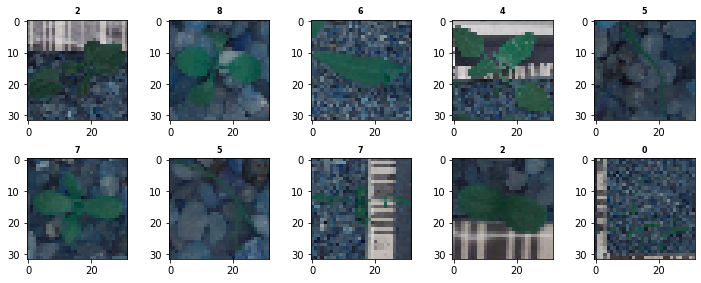

In [ ]:
def plot_images(images, labels, num_row=4, num_col=6):
   
    fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
    for i in range(0,num_row * num_col):
        ax = axes[i//num_col, i%num_col]       
        ax.imshow(images[i], cmap="gray")
        ax.set_title(labels[i],weight='bold',fontsize=8)
    plt.tight_layout()    
    plt.show()

plot_images(images,labels, num_row=2, num_col=5)

**Split the data into train and test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

In [ ]:
print("No. of images in X_train:", len(X_train))
print("No. of images in X_test:", len(X_test))
print("Shape of Image in X_train:", X_train[0].shape)
print("Shape of Image in X_test:", X_test[0].shape)
print("No. of labels in y_train:", len(y_train))
print("No. of labels in y_test:", len(y_test))

No. of images in X_train: 3170
No. of images in X_test: 1359
Shape of Image in X_train: (32, 32, 3)
Shape of Image in X_test: (32, 32, 3)
No. of labels in y_train: 3170
No. of labels in y_test: 1359


**Normalize the data by dividing by 255**

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

**One hot encode the labels for train and test data**

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=11)
y_test = to_categorical(y_test, num_classes=11)

In [ ]:
X_train.shape

(3170, 32, 32, 3)

**Build the Nueral Network Model**

In [ ]:
tf.keras.backend.clear_session()

nn_model = Sequential()

nn_input_shape = (32,32,3)

nn_model.add(tf.keras.layers.Reshape((3072,),input_shape=nn_input_shape))

nn_model.add(Dense(128))

nn_model.add(tf.keras.layers.LeakyReLU(0.1)) #LeakyRelu

nn_model.add(Dense(64))

nn_model.add(tf.keras.layers.LeakyReLU(0.1)) #LeakyRelu

nn_model.add(Dense(32))

nn_model.add(tf.keras.layers.LeakyReLU(0.1)) #LeakyRelu

nn_model.add(Dense(11, activation="softmax"))

**Display the Nueral Network Model Summary**

In [ ]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32)                0

**Compile the Neural Network Model**

In [ ]:
nn_model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

**Fit the Nueral Network Model**

In [ ]:
nn_training_history = nn_model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
100/100 [==============================] - 1s 7ms/step - loss: 0.1110 - accuracy: 0.9656 - val_loss: 2.5275 - val_accuracy: 0.5342
Epoch 2/50
100/100 [==============================] - 1s 7ms/step - loss: 0.0835 - accuracy: 0.9757 - val_loss: 2.5833 - val_accuracy: 0.5276
Epoch 3/50
100/100 [==============================] - 1s 6ms/step - loss: 0.0832 - accuracy: 0.9751 - val_loss: 2.3559 - val_accuracy: 0.5519
Epoch 4/50
100/100 [==============================] - 1s 7ms/step - loss: 0.0620 - accuracy: 0.9845 - val_loss: 2.4306 - val_accuracy: 0.5533
Epoch 5/50
100/100 [==============================] - 1s 6ms/step - loss: 0.0684 - accuracy: 0.9817 - val_loss: 2.4362 - val_accuracy: 0.5467
Epoch 6/50
100/100 [==============================] - 1s 6ms/step - loss: 0.0754 - accuracy: 0.9782 - val_loss: 2.5026 - val_accuracy: 0.5394
Epoch 7/50
100/100 [==============================] - 1s 7ms/step - loss: 0.0908 - accuracy: 0.9729 - val_loss: 2.8071 - val_accuracy: 0.4901
Epoch 

**Evaluate the Neural Network Model**

In [ ]:
nn_test_score = nn_model.evaluate(X_test, y_test)
print('Test loss:', nn_test_score[0])
print('Test accuracy:', nn_test_score[1])

nn_train_score = nn_model.evaluate(X_train, y_train)
print('Trainig loss:', nn_train_score[0])
print('Trainig accuracy:', nn_train_score[1])

43/43 [==============================] - 0s 2ms/step - loss: 3.1377 - accuracy: 0.5519
Test loss: 3.137666940689087
Test accuracy: 0.5518763661384583
100/100 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Trainig loss: 0.004519561305642128
Trainig accuracy: 1.0


**The training accuracy touches almost 100%, but the validation accuracy does not improve beyond 56%. Batch sizes of 16 and 32 were used. This means that the image features learned by the neural network layers with the training dataset are not good enough in classifying the images correctly with the validation or test data set and the model is highly over fitting.**

**Build the CNN Model**

In [ ]:
cnn_input_shape = (32,32,3)

num_classes = 11

cnn_model = Sequential() 

cnn_model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', input_shape=cnn_input_shape))

cnn_model.add(MaxPooling2D())

cnn_model.add(Conv2D(filters = 64, kernel_size=(5, 5), activation='relu'))

cnn_model.add(MaxPooling2D(pool_size=(2,2))) 

cnn_model.add(Flatten())

cnn_model.add(Dense(256)) 

cnn_model.add(tf.keras.layers.LeakyReLU(0.1)) #LeakyRelu

cnn_model.add(Dense(64))

cnn_model.add(tf.keras.layers.LeakyReLU(0.1)) #LeakyRelu

cnn_model.add(Dense(32))

cnn_model.add(tf.keras.layers.LeakyReLU(0.1)) #LeakyRelu

cnn_model.add(Dense(num_classes, activation='softmax'))

**Display CNN Model Summary**

In [ ]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               409856    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)              

**Compile the CNN Model**

In [ ]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Fit the CNN Model and store the training history**

In [ ]:
cnn_training_history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=30, verbose=1, validation_data=(X_test, y_test))

Epoch 1/30
100/100 [==============================] - 7s 66ms/step - loss: 2.3518 - accuracy: 0.1451 - val_loss: 2.1388 - val_accuracy: 0.1928
Epoch 2/30
100/100 [==============================] - 6s 64ms/step - loss: 2.0666 - accuracy: 0.2477 - val_loss: 1.6982 - val_accuracy: 0.3834
Epoch 3/30
100/100 [==============================] - 6s 64ms/step - loss: 1.7467 - accuracy: 0.3597 - val_loss: 1.5193 - val_accuracy: 0.4511
Epoch 4/30
100/100 [==============================] - 6s 65ms/step - loss: 1.4896 - accuracy: 0.4462 - val_loss: 1.3805 - val_accuracy: 0.4915
Epoch 5/30
100/100 [==============================] - 6s 64ms/step - loss: 1.3886 - accuracy: 0.4846 - val_loss: 1.2068 - val_accuracy: 0.5666
Epoch 6/30
100/100 [==============================] - 6s 64ms/step - loss: 1.0811 - accuracy: 0.6220 - val_loss: 1.0712 - val_accuracy: 0.6424
Epoch 7/30
100/100 [==============================] - 6s 64ms/step - loss: 0.9627 - accuracy: 0.6579 - val_loss: 1.0201 - val_accuracy: 0.6409

**Evaluate the CNN model**

In [ ]:
cnn_test_score = cnn_model.evaluate(X_test, y_test)
print('Test loss:', cnn_test_score[0])
print('Test accuracy:', cnn_test_score[1])

cnn_train_score = cnn_model.evaluate(X_train, y_train)
print('Training loss:', cnn_train_score[0])
print('Training accuracy:', cnn_train_score[1])

43/43 [==============================] - 1s 15ms/step - loss: 1.0438 - accuracy: 0.7712
Test loss: 1.0437921285629272
Test accuracy: 0.7711552381515503
100/100 [==============================] - 2s 15ms/step - loss: 0.0526 - accuracy: 0.9842
Training loss: 0.05262172594666481
Training accuracy: 0.9842271208763123


**The best model in terms of training and test accuracy is the CNN model as shown above. The training accuracy is 98% and the test accuracy is 77%, which means that it is still an overfit model. Batch sizes of 16 and 32 were used to compare the results**

**Pickle the CNN Model**

In [ ]:
cnn_model.save('cnn_plant_seed.h5')
cnn_model.save_weights('cnn_plant_seed_weights.h5')

**Upload all test images from the test folder**

In [ ]:
test_path = "/content/drive/MyDrive/Colab Notebooks/Data/test/"
test_images = []
test_image_files = []
for img in os.listdir(test_path):
    test_image_files.append(img)
    img = cv2.imread(test_path + img)
    img = cv2.resize(img, (32,32))
    test_images.append(img)

**Convert test_images list to numpy array**

In [ ]:
test_images = np.array(test_images)

**Normalize the test images**

In [ ]:
test_images = test_images.astype('float32')
test_images /= 255

**Predict the CNN model on test images**

In [ ]:
test_images_labels = cnn_model.predict(test_images)

**Evaluate the CNN model on test images**

In [ ]:
cnn_test_images_score = cnn_model.evaluate(test_images, test_images_labels)
print('Test Images Loss:', cnn_test_images_score[0])
print('Test Images accuracy:', cnn_test_images_score[1])

25/25 [==============================] - 0s 15ms/step - loss: 0.2300 - accuracy: 1.0000
Test Images Loss: 0.22999365627765656
Test Images accuracy: 1.0


**The accuracy of the CNN model on test images is 100%**

**Extract the label identifier from the one-hot encodings**

In [ ]:
test_images_label_idf = np.argmax(test_images_labels, axis = 1)

**Create the csv file and add the file names along with the labels**

In [ ]:
import csv
header = ['File', 'Species']
with open('sample_submission.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    for i in np.arange(0, len(test_image_files)):
      if (test_images_label_idf[i] == 0):
        test_image_label_name = 'Black-grass'
      elif (test_images_label_idf[i] == 1):
        test_image_label_name = 'Charlock'
      elif (test_images_label_idf[i] == 2):
        test_image_label_name = 'Cleavers'
      elif (test_images_label_idf[i] == 3):
        test_image_label_name = 'Common Chickweed'
      elif (test_images_label_idf[i] == 4):
        test_image_label_name = 'Fat Hen'
      elif (test_images_label_idf[i] == 5):
        test_image_label_name = 'Loose Silky-bent'
      elif (test_images_label_idf[i] == 6):
        test_image_label_name = 'Maize'
      elif (test_images_label_idf[i] == 7):
        test_image_label_name = 'Scentless Mayweed'
      elif (test_images_label_idf[i] == 8):
        test_image_label_name = 'Shepherds Purse'
      elif (test_images_label_idf[i] == 9):
        test_image_label_name = 'Small-flowered Cranesbill'
      else:
        test_image_label_name = 'Sugar beet'
      data = [test_image_files[i], test_image_label_name]
      writer.writerow(data)